# Exploratory Data Analysis

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set()
sns.set_context("talk")

## Load  and examine data

In [2]:
titanic = pd.read_csv('data/titanic.csv')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB



We do not have data on all passengers.

## Missing data

* ```isna(obj)```	Detect missing values for an array-like object.
* ```notna(obj)```	Detect non-missing values for an array-like object.

The pandas documentation provides a full chapter of missing data at https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html. This section will discuss how to check for missing data and how to drop or fill it with values.

In [5]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

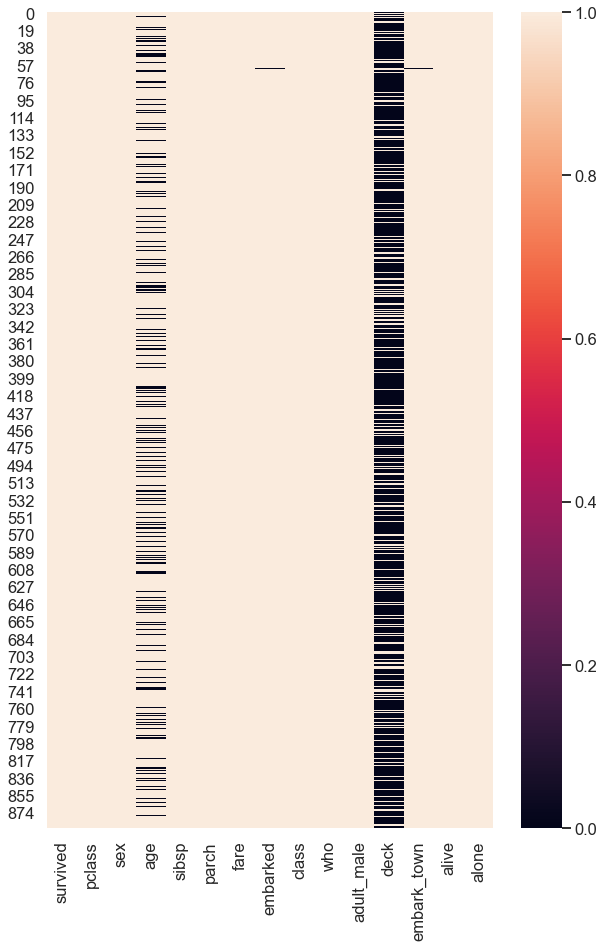

In [6]:
plt.figure(figsize=(10,15))
sns.heatmap(titanic.notna())

## Handling missing data
Missing data can be handled by
- dropping rows or columns that have missing values 
- filling them the missing values with another non-missing value.

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#missing-data-handling

### Drop missing data

"Remove missing values."

```python
DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
```
### Fill missing data

"Fill NA/NaN values using the specified method."

```python
DataFrame.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
```

In [7]:
# create a DataFrame that has missing data
# example from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [8]:
# drop rows with missing data
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [9]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [10]:
# drop columns with missing data
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [11]:
# drop rows where all elements are missing
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [12]:
# fill missing values with single value
df.fillna(0)

,name,toy,born
0,Alfred,0,0
1,Batman,Batmobile,1940-04-25 00:00:00
2,Catwoman,Bullwhip,0


In [13]:
# fill missing values column-wise
df.fillna(value={'toy': 'Teddy-bear', 'born': pd.Timestamp("1935-04-25")})

,name,toy,born
0,Alfred,Teddy-bear,1935-04-25
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,1935-04-25


### back to titanic

<AxesSubplot:>

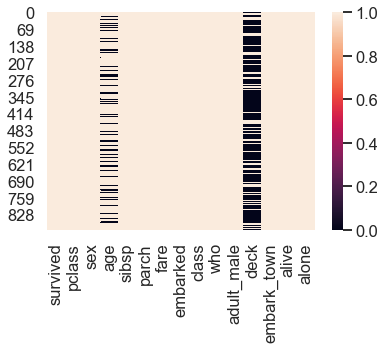

In [14]:
sns.heatmap(titanic.notna())

In [15]:
titanic = titanic.fillna({'age':titanic['age'].mean()})

In [16]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
titanic = titanic.dropna(axis='columns') # drop embarked,embarked_town, deck

In [18]:
titanic.isna().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

### Rename rows or columns

```python
DataFrame.rename(mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None)
```

"Alter axes labels.

Function / dict values must be unique (1-to-1). Labels not contained in a dict / Series will be left as-is. Extra labels listed don’t throw an error.

**Parameters:**
* **mapper, index, columns:** *dict-like or function, optional*. dict-like or functions transformations to apply to that axis’ values. Use either ```mapper``` and ```axis``` to specify the axis to target with ```mapper```, or ```index``` and ```columns```.
* **axis:** *int or str, optional*. Axis to target with ```mapper```. Can be either the axis name (‘index’, ‘columns’) or number (0, 1). The default is ‘index’.
* **copy:** *boolean, default ```True```*. Also copy underlying data
* **inplace:** *boolean, default ```False```*. Whether to return a new DataFrame. If ```True``` then value of copy is ignored.
* **level:** *int or level name, default ```None```*. In case of a ```MultiIndex```, only rename labels in the specified level.

**Returns: renamed:** DataFrame.

```DataFrame.rename``` supports two calling conventions
* ```(index=index_mapper, columns=columns_mapper, ...)```
* ```(mapper, axis={'index', 'columns'}, ...)```

We *highly* recommend using keyword arguments to clarify your intent."

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html#pandas.DataFrame.rename

In [19]:
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [20]:
# rename columns and make index uppercase using the index and columns mappers
df.rename(columns=str.upper, index={0: 'a', 1: 'b', 2: 'c'})

,NAME,TOY,BORN
a,Alfred,NaN,NaT
b,Batman,Batmobile,1940-04-25
c,Catwoman,Bullwhip,NaT


In [21]:
titanic.rename(columns=str.capitalize).head()

,Survived,Pclass,Sex,Age,Sibsp,Parch,Fare,Class,Who,Adult_male,Alive,Alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,no,True


# Simple Stats

In [22]:
titanic['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [23]:
titanic["survived"].unique()

array([0, 1])

In [24]:
titanic["survived"].sum()

342

In [25]:
titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [26]:
titanic["survived"].mean()

0.3838383838383838

In [27]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The following table summarizes some other built-in Pandas functions:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |
|``unique()``| all unique values in a column|
|``nunique()``| number of unique values in a column|
|``value_counts()``|count the frequency of unique values|
|`describe()`|compute basic statistics|

We have seen the survival rate in general but are there factors that influence it. Like gender or age?

# GroupBy

"By *group by* we are referring to a process involving one or more of the following steps:
* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure"



![](img/split-apply-combine.png)

This makes clear what the ``groupby`` accomplishes:

- The *split* step  breaks up and groups a ``DataFrame`` depending on the value of the specified key.
- The *apply* step computes some function, within the individual groups.
- The *combine* step merges the results of these operations into an output array.

`groupby` does this faster than manually performing each step.
This is a very common operation

In [28]:
df = pd.DataFrame(
    {"key": ["A", "B", "C", "A", "B", "C"], "data": range(6)}, columns=["key", "data"]
)
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [29]:
df.groupby("key")

In [30]:
df.groupby("key").sum()

,data
key,
A,3
B,5
C,7


## groupby column indexing

In [31]:
titanic.groupby("sex")["survived"]

In [32]:
titanic.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

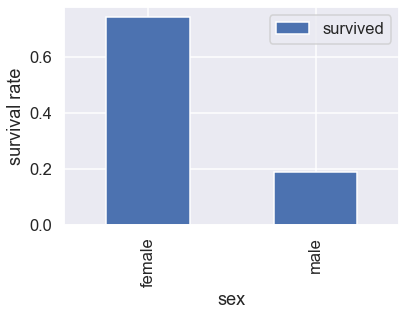

In [33]:
titanic.groupby("sex")[["survived"]].mean().plot.bar()
plt.ylabel("survival rate");

/anaconda3/envs/gfu_dl/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='survived'>

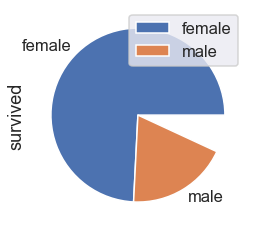

In [34]:
titanic.dropna().groupby("sex")[["survived"]].mean().plot.pie(y='survived')

In [35]:
titanic.groupby(["sex", "class"])["survived"].aggregate("mean")

sex     class 
female  First     0.968085
        Second    0.921053
        Third     0.500000
male    First     0.368852
        Second    0.157407
        Third     0.135447
Name: survived, dtype: float64

This gives us a better idea of how both gender and class affected survival, but the code is starting to look a bit garbled.


In [36]:
titanic.groupby(["sex", "class"])["survived"].aggregate("sum")

sex     class 
female  First     91
        Second    70
        Third     72
male    First     45
        Second    17
        Third     47
Name: survived, dtype: int64

# Pivot Tables

 *pivot table* is a similar operation
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

It helps to think of pivot tables as essentially a *multidimensional* version of ``GroupBy`` aggregation.


## Pivot Table Syntax

Here is the equivalent to the preceding operation using the ``pivot_table`` method of ``DataFrame``:

In [37]:
titanic.pivot_table("survived", index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [38]:
titanic.pivot_table("survived", index="sex", columns="class", aggfunc="sum")

class,First,Second,Third
sex,,,
female,91,70,72
male,45,17,47


### Multi-level pivot tables

The grouping in pivot tables can be specified with multiple levels.

In [39]:
titanic["age_group"] = pd.cut(titanic["age"], [0, 18, 80]) #bins the ages 

In [40]:
titanic.pivot_table("survived", ["sex", "age_group"], "class")

class                First    Second     Third
sex    age_group                              
female (0, 18]    0.909091  1.000000  0.511628
       (18, 80]   0.975904  0.903226  0.495050
male   (0, 18]    0.800000  0.600000  0.215686
       (18, 80]   0.350427  0.086022  0.121622

We can apply the same strategy when working with the columns 

In [41]:
titanic.pivot_table("survived", ["sex", "age_group"], ["alone", "class"])

alone                False                         True                     
class                First    Second     Third     First    Second     Third
sex    age_group                                                            
female (0, 18]    0.900000  1.000000  0.451613  1.000000  1.000000  0.666667
       (18, 80]   0.980000  0.906250  0.396226  0.969697  0.900000  0.604167
male   (0, 18]    0.800000  1.000000  0.250000       NaN  0.000000  0.133333
       (18, 80]   0.380952  0.037037  0.127660  0.333333  0.106061  0.120482

### Additional pivot table options

The full call signature of the ``pivot_table`` method of ``DataFrame`` is as follows:

```python
DataFrame.pivot_table(values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False)
```

The options, ``fill_value`` and ``dropna`` handle missing data

The ``aggfunc`` keyword controls what type of aggregation is applied, which is a mean by default.
As in the GroupBy, the aggregation specification can be a string representing one of several common choices (e.g., ``'sum'``, ``'mean'``, ``'count'``, ``'min'``, ``'max'``, etc.) or a function that implements an aggregation (e.g., ``np.sum()``, ``min()``, ``sum()``, etc.).

Additionally, it can be specified as a dictionary mapping a column to any of the above desired options:

In [42]:
titanic.pivot_table(index="sex", columns="class", aggfunc={"survived": sum, "fare": "mean"})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

At times it's useful to compute totals along each grouping.
This can be done via the ``margins`` keyword:

In [43]:
titanic.pivot_table("survived", index="sex", columns="class", margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


Here this automatically gives us information about the class-agnostic survival rate by gender, the gender-agnostic survival rate by class, and the overall survival rate of 38%.
The margin label can be specified with the ``margins_name`` keyword, which defaults to ``"All"``.

## Excerise: 

### Birthrate Data



### 1. Load data 'data/births.csv'

In [45]:
births = pd.read_csv("data/births.csv")

### 2. Take a  look at the data. Is the any missing data? What would you handle it? Which columns are there? 

In [46]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [47]:
births.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [48]:
births['day'].value_counts()

27.0    480
25.0    480
2.0     480
3.0     480
4.0     480
5.0     480
6.0     480
7.0     480
8.0     480
10.0    480
12.0    480
14.0    480
16.0    480
20.0    480
24.0    480
28.0    480
17.0    480
23.0    480
9.0     480
21.0    480
11.0    480
13.0    480
15.0    480
18.0    480
22.0    480
26.0    480
19.0    480
1.0     480
29.0    464
30.0    450
31.0    363
99.0    350
Name: day, dtype: int64

In [47]:
births['day'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99., nan])

In [54]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


<AxesSubplot:>

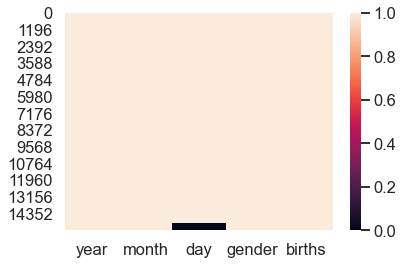

In [56]:
sns.heatmap(births.notna())

### 3. Use Groupby to find the number of birth per year. (male and female)

In [85]:
births.groupby("year")["births"].sum()

year
1969    3600206
1970    3737800
1971    3563548
1972    3266235
1973    3146125
1974    3170631
1975    3153556
1976    3176476
1977    3332159
1978    3338300
1979    3499795
1980    3617981
1981    3635515
1982    3685457
1983    3642821
1984    3673568
1985    3765064
1986    3760695
1987    3813216
1988    3913793
1989    4045693
1990    4162917
1991    4115342
1992    4069428
1993    4004523
1994    3956925
1995    3903012
1996    3894874
1997    3884329
1998    3945192
1999    3963465
2000    4063823
2001    4031531
2002    4027376
2003    4096092
2004    4118907
2005    4145619
2006    4273225
2007    4324008
2008    4255156
Name: births, dtype: int64

#### Plot the result

Text(0, 0.5, 'births')

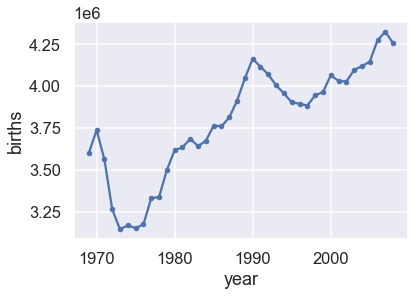

In [49]:
s = births.groupby("year")["births"].sum()
s.plot(marker='.')
plt.ylabel("births")

### 4. Add a decade column, and take a look at male and female births as a function of decade using `pivot_table`

In [86]:
births["decade"] = 10 * (births["year"] // 10)
births.pivot_table("births", index="decade", columns="gender", aggfunc="sum")

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


### 5. Plot male and female births as a function of year using `pivot_table`

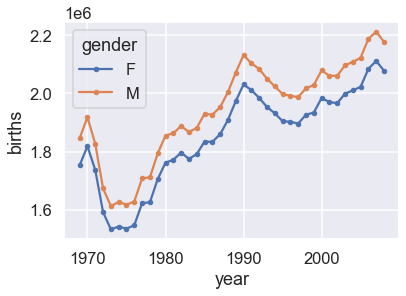

In [95]:
births.pivot_table("births", index="year", columns="gender", aggfunc="sum").plot(marker=".")
plt.ylabel("births");

In [50]:
births.pivot_table("births", index="year", columns="gender", aggfunc="sum",
                   margins=True)

gender,F,M,All
year,,,
1969,1753634,1846572,3600206
1970,1819164,1918636,3737800
1971,1736774,1826774,3563548
1972,1592347,1673888,3266235
1973,1533102,1613023,3146125
1974,1543005,1627626,3170631
1975,1535546,1618010,3153556
1976,1547613,1628863,3176476
1977,1623363,1708796,3332159


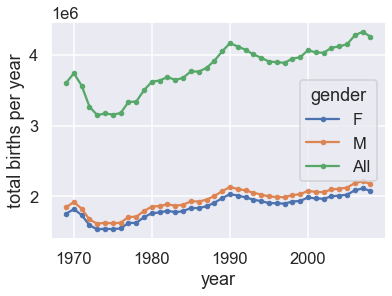

In [94]:
births.pivot_table("births", index="year", columns="gender", aggfunc="sum",
                   margins=True).iloc[:-1].plot(marker=".")
plt.ylabel("total births per year");

## 6. Group by

Use the data from the European Parliament Election from 2019 (downloaded from https://www.bundeswahlleiter.de/dam/jcr/8cc9ae77-6e83-41ba-b7ee-23bc64fb3f5b/ew19_arbtab2.pdf and saved at data/eu2019.csv as a preprocessed csv file) to answer the following questions:
1. Are there missing values in the data? What do the missing values indicate? Is there a common pattern? Think about the consequences for calculating some measures such as counting the total number of votes for a party.
2. Check the column names. What are the potential issues with the current names? Change the column names to something better.
3. How many different parties are part of the data? Is there a special case in the data (tip: count the number of Kreis Nr. per party)?
4. Count the number of rows for the party "SPD" and the combination of "CDU" and "CSU". Why do the numbers not match? (try both, boolean indexing and using the ```count()``` method after grouping the data. Explain the different results.)
5. Sum the 'Gültige Stimmen %' column for 
  * Bundesrepublik Deutschland
  * the states (Bundesländer)
  * the city districts (Kreis) by 'Kreis Nr.' or 'Gebietsbezeichnung' columns
  
Explain the results. Do all add up to ~100%? Why does the group by column 'Kreis Nr.' and 'Gebietsbezeichnung' produce different results for the city districts?



In [164]:
##### read the data

# your code goes here...

In [51]:
import pandas as pd
df = pd.read_csv('data/eu2019.csv', )
df.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2


In [52]:
import pandas as pd
df = pd.read_csv('data/eu2019.csv', sep=';')
df.head()

,Partei,Kreis Nr.,Gebietsbezeichnung,Gültige Stimmen Anzahl,Gültige Stimmen %,Diff. zu 2014 in %-Pkt.
0,CDU,NaN,Bundesrepublik Deutschland,8437093,22.6,-7.5
1,CDU,NaN,Schleswig-Holstein,353789,26.2,-8.2
2,CDU,1001.0,"Flensburg, Stadt",6829,17.3,-8.3
3,CDU,1002.0,"Kiel, Landeshauptstadt",18313,16.8,-6.4
4,CDU,1003.0,"Lübeck, Hansestadt",18416,20.4,-7.1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881 entries, 0 to 5880
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Partei                   5881 non-null   object 
 1   Kreis Nr.                5642 non-null   float64
 2   Gebietsbezeichnung       5881 non-null   object 
 3   Gültige Stimmen Anzahl   5881 non-null   int64  
 4   Gültige Stimmen %        5881 non-null   float64
 5   Diff. zu 2014 in %-Pkt.  5881 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 275.8+ KB


### 1. Are there missing values in the data? What do the missing values indicate? Think about the consequences for calculating some measures such as counting the total number of votes for a party.

In [54]:
# check for missing data
pd.isna(df).sum()

# only the column 'Kreis Nr.' has missing values

Partei                       0
Kreis Nr.                  239
Gebietsbezeichnung           0
Gültige Stimmen Anzahl       0
Gültige Stimmen %            0
Diff. zu 2014 in %-Pkt.      0
dtype: int64

In [55]:
# check rows that have missing values
df.loc[df['Kreis Nr.'].isnull()]

# when column 'Gebietsbezeichnung' is Bundesrepublik Deutschland or one of the states, there is no
# value for 'Kreis Nr.'

,Partei,Kreis Nr.,Gebietsbezeichnung,Gültige Stimmen Anzahl,Gültige Stimmen %,Diff. zu 2014 in %-Pkt.
0,CDU,NaN,Bundesrepublik Deutschland,8437093,22.6,-7.5
1,CDU,NaN,Schleswig-Holstein,353789,26.2,-8.2
17,CDU,NaN,Hamburg,140023,17.7,-6.9
19,CDU,NaN,Niedersachsen,1119078,29.9,-9.5
104,CDU,NaN,Baden-Württemberg,1498629,30.8,-8.5
...,...,...,...,...,...,...
5742,Sonstige,NaN,Rheinland-Pfalz,60834,3.1,1.5
5784,Sonstige,NaN,Bayern,199969,3.5,0.8
5838,Sonstige,NaN,Saarland,17188,3.4,2.3
5852,Sonstige,NaN,Sachsen-Anhalt,65433,6.7,4.2


In [58]:
# get all unique/distinct values for Gebietsbezeichnung when Kreis Nr. is missing
df[df['Kreis Nr.'].isnull()]['Gebietsbezeichnung'].unique()

array(['Bundesrepublik Deutschland', 'Schleswig-Holstein', 'Hamburg',
       'Niedersachsen', 'Baden-Württemberg', 'Brandenburg',
       'Mecklenburg-Vorpommern', 'Sachsen', 'Saarland', 'Berlin',
       'Bayern', 'Bremen', 'Nordrhein-Westfalen', 'Hessen',
       'Rheinland-Pfalz', 'Sachsen-Anhalt', 'Thüringen'], dtype=object)

### 2. Check the column names. What are the potential issues with the current names? Change the column names to something better.
Whitespaces and special characters such as '%" or 'ü' can lead to problems. It is smart to change them to something shorter and using ASCII characters.

In [59]:
# rename the columns
df = df.rename(columns={'Kreis Nr.': 'Kreis', 'Gültige Stimmen Anzahl': 'Stimmen_A', 
           'Gültige Stimmen %': 'Stimmen_P', 'Diff. zu 2014 in %-Pkt.': 'Diff_2014'})
df.head()

,Partei,Kreis,Gebietsbezeichnung,Stimmen_A,Stimmen_P,Diff_2014
0,CDU,NaN,Bundesrepublik Deutschland,8437093,22.6,-7.5
1,CDU,NaN,Schleswig-Holstein,353789,26.2,-8.2
2,CDU,1001.0,"Flensburg, Stadt",6829,17.3,-8.3
3,CDU,1002.0,"Kiel, Landeshauptstadt",18313,16.8,-6.4
4,CDU,1003.0,"Lübeck, Hansestadt",18416,20.4,-7.1


### 3. How many different parties are part of the data? Is there a special case in the data (tip: count the number of Kreis Nr. per party)?

In [60]:
# get the unique values for the 'Partei' column
df['Partei'].unique()

array(['CDU', 'SPD', 'GRÜNE', 'DIE LINKE', 'AfD', 'CSU', 'FDP',
       'FREIE WÄHLER', 'PIRATEN', 'Tierschutzpartei', 'FAMILIE', 'ÖDP',
       'Die PARTEI', 'Volt', 'Sonstige'], dtype=object)

In [61]:
# number of different parties in the data
len(df['Partei'].unique())

15

In [62]:
df['Partei'].nunique()

15

In [64]:
# count the number of Kreis Nr per party to check for special cases
grouped = df.loc[:,['Partei','Kreis']].groupby('Partei')
grouped.count()

# count excludes missing values (Germany and states here)

,Kreis
Partei,
AfD,403
CDU,307
CSU,96
DIE LINKE,403
Die PARTEI,403
FAMILIE,403
FDP,403
FREIE WÄHLER,403
GRÜNE,403


### 4. Count the number of rows for the party "SPD" and the combination of "CDU" and "CSU". Why do the numbers not match? (try both, boolean indexing and using the ```count()``` method after grouping the data. Explain the different results.)

In [65]:
# count the number of rows with boolean indexing
# len includes missing values!
len(df[(df["Partei"] == "SPD")])

420

In [66]:
df[(df["Partei"] == "SPD")].count()

Partei                420
Kreis                 403
Gebietsbezeichnung    420
Stimmen_A             420
Stimmen_P             420
Diff_2014             420
dtype: int64

In [175]:
# count the combination of 'CDU' and 'CSU' entries
# this includes 'Bundesrepublik Deutschland' twice
len(df[(df["Partei"] == "CDU") | (df.Partei == "CSU")])

421

In [67]:
# another way to produce the same result
len(df[df["Partei"].isin(["CDU", "CSU"])])

421


In addition, the combination of 'CDU' and 'CSU' has one row more than all other parties when using the ```len()``` method. This is because the data includes an entry for 'Gebietsbezeichnung' = 'Bundesrepublik Deutschland' for every party (and therefore two rows for the combination of 'CDU' and 'CSU'). These small variations of results when using different methods and special cases in the data are very important to think about when doing data analysis in pandas.

### 5. Sum the 'Gültige Stimmen %' column for 
  * Bundesrepublik Deutschland
  * the states (Bundesländer)
  * the city districts (Kreis) by 'Kreis Nr.' or 'Gebietsbezeichnung' columns
  
  Explain the results. Do all add up to ~100%? Why does the group by column 'Kreis Nr.' and 'Gebietsbezeichnung' produce different results for the city districts?

In [68]:
df

,Partei,Kreis,Gebietsbezeichnung,Stimmen_A,Stimmen_P,Diff_2014
0,CDU,NaN,Bundesrepublik Deutschland,8437093,22.6,-7.5
1,CDU,NaN,Schleswig-Holstein,353789,26.2,-8.2
2,CDU,1001.0,"Flensburg, Stadt",6829,17.3,-8.3
3,CDU,1002.0,"Kiel, Landeshauptstadt",18313,16.8,-6.4
4,CDU,1003.0,"Lübeck, Hansestadt",18416,20.4,-7.1
...,...,...,...,...,...,...
5876,Sonstige,16063.0,Wartburgkreis,3536,5.8,3.8
5877,Sonstige,16064.0,Unstrut-Hainich-Kreis,2413,4.9,2.9
5878,Sonstige,16065.0,Kyffhäuserkreis,2474,6.8,4.8
5879,Sonstige,16066.0,Schmalkalden-Meiningen,3473,5.6,3.6


In [69]:
# sum 'Gültige Stimmen %' for Bundesrepublik Deutschland
df.loc[df['Gebietsbezeichnung'] == 'Bundesrepublik Deutschland','Stimmen_P'].sum()

100.00000000000003

In [71]:
# sum 'Gültige Stimmen %' for the states
# get states by selecting rows with no value in the 'Kreis' column and
# filter out 'Bundesrepublik Deutschland' in 'Gebietsbezeichnung' 
# (also does not have a value in 'Kreis Nr.')
df[(df.loc[:,'Gebietsbezeichnung'] != 'Bundesrepublik Deutschland') &
   (df.loc[:,'Kreis'].isnull())].groupby('Gebietsbezeichnung').sum()

,Kreis,Stimmen_A,Stimmen_P,Diff_2014
Gebietsbezeichnung,,,,
Baden-Württemberg,0.0,4868373,100.0,0.7
Bayern,0.0,5785366,100.2,0.6
Berlin,0.0,1355742,99.7,1.1
Brandenburg,0.0,1197430,100.0,2.5
Bremen,0.0,291424,100.0,0.5
Hamburg,0.0,758234,100.2,0.3
Hessen,0.0,1903148,100.0,0.8
Mecklenburg-Vorpommern,0.0,574381,100.1,3.0
Niedersachsen,0.0,2769562,99.8,0.5


In [138]:
# select city districts by dropping rows that have NaN values (country and states)
df.dropna().groupby('Gebietsbezeichnung').sum().sort_values(by=['Stimmen_P'])

,Kreis,Stimmen_A,Stimmen_P,Diff_2014
Gebietsbezeichnung,,,,
Städteregion Aachen 7,5334.0,1068,0.4,0.0
Städteregion Aachen10,5334.0,1151,0.5,0.1
Städteregion Aachen 8,5334.0,2236,0.9,-1.1
Städteregion Aachen 11,5334.0,2261,0.9,0.6
Städteregion Aachen 9,5334.0,3323,1.3,0.3
Städteregion Aachen 13,5334.0,4205,1.7,1.7
Städteregion Aachen 12,5334.0,6784,2.7,2.1
Städteregion Aachen 14,5334.0,7254,2.9,1.5
Städteregion Aachen 4,5334.0,10988,4.4,-0.2


In [72]:
# same as above by group by 'Kreis Nr.' instead
df.dropna().groupby('Kreis').sum().sort_values(by=['Stimmen_P'])

,Stimmen_A,Stimmen_P,Diff_2014
Kreis,,,
11000.0,1355742,99.7,1.1
8216.0,98741,99.7,0.6
3158.0,56690,99.7,0.9
9780.0,67594,99.8,0.3
16051.0,99160,99.8,2.5
...,...,...,...
9171.0,41506,100.2,0.3
14522.0,158362,100.2,4.0
1053.0,91295,100.3,0.6


Aachen is different than the rest as there are multiple values for the 'Gebietsbezeichnung' column (multiple regions of the city, e.g. 'Städteregion Aachen 6'). When grouping by 'Kreis' instead, this is not a problem as all city regions in Aachen have the same value for the 'Kreis'

In [73]:
df.dropna().groupby('Kreis').sum().sort_values(by=['Stimmen_P']).loc[5334]

Stimmen_A    148272.0
Stimmen_P        99.8
Diff_2014         0.3
Name: 5334.0, dtype: float64